In [1]:
import pandas as pd
df = pd.read_csv("D:\Datasets\calories2.csv")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [3]:
df2 = pd.read_csv("D:\Datasets\calories1.csv")
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df['Calories'] = df2['Calories']

In [5]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df.shape

(15000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df = df.drop('User_ID',axis = 1)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['Gender'] = le.fit_transform(df['Gender'])

In [35]:
df.to_csv("Calories_Modified_Dataset",index=False)

In [17]:
X = df.drop('Calories',axis=1)
Y = df['Calories']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [22]:
rf.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
Training_data_prediction = rf.predict(X_train)

In [27]:
from sklearn import metrics
score1 = metrics.r2_score(Y_train,Training_data_prediction)
score2 = metrics.mean_absolute_error(Y_train,Training_data_prediction)

print("R2_Score of Training Data : ",score1)
print("MSE of Training Data : ",score2)

R2_Score of Training Data :  0.994625053291549
MSE of Training Data :  2.9043350000000006


In [25]:
rf.score(X_train,Y_train)

0.994625053291549

In [28]:
#testing Data
rf.fit(X_test,Y_test)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
Testing_data_prediction = rf.predict(X_test)

In [31]:
from sklearn import metrics
score1 = metrics.r2_score(Y_test,Testing_data_prediction)
score2 = metrics.mean_absolute_error(Y_test,Testing_data_prediction)

print("R2_Score of Testing Data : ",score1)
print("MSE of Testing Data : ",score2)

R2_Score of Testing Data :  0.999197816640218
MSE of Testing Data :  1.128183333333333


Text(0.5, 1.0, 'Actual vs Predicted Values')

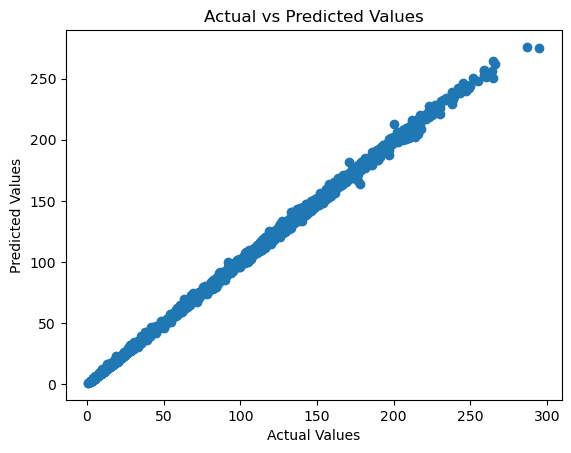

In [32]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Testing_data_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

In [ ]:
plt.scatter(Y_train, Training_data_prediction, label='Training', alpha=0.7)
plt.scatter(Y_test, Testing_data_prediction, label='Testing', alpha=0.7)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


In [41]:
#Predictive Model
import numpy as np
input = (0,20,165.0,59.0,29.0,100.0,41.0)
input_array = np.asarray(input)
reshaped_data = input_array.reshape(1,-1)
prediction = rf.predict(reshaped_data)

print("Burnt Calories is : ",prediction)

Burnt Calories is :  [149.47]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
